In [2]:
from kucoin.client import Client
from kucoin.asyncio import KucoinSocketManager
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
import asyncio
import plotly.express as px
from pathlib import Path
import time as t
import threading
import requests
from requests import Request, Session
import datetime
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

%matplotlib inline

In [3]:
from dotenv import load_dotenv
load_dotenv()

True

In [4]:
api_key = os.getenv("KUCOIN_API_KEY")
secret_key = os.getenv("KUCOIN_SECRET_KEY")
passphrase = os.getenv("KUCOIN_PASSPHRASE")
cmc_key = os.getenv('CMC_KEY')
client = Client(api_key,secret_key,passphrase)
client

In [5]:
accounts = client.get_accounts()
dfkcs = pd.DataFrame(accounts)
dfkcs2 = dfkcs.groupby('currency').sum()
dfkcs2.to_csv('dfkcs2.csv')

***_COIN MARKET CAP DATA_***

***_INDEX TOKENS_***

In [6]:
# Request data from Kuc API & Convert to Json
btc = requests.get('https://api.kucoin.com/api/v1/market/candles?type=8hour&symbol=BTC-USDT&startAt=1620360000&endAt=0')
btc_j = btc.json()

In [7]:
# Convert json to DataFrame
btc_df = pd.DataFrame(btc_j['data'])

In [8]:
# Rename Date, Open, & Close columns and remove others
btc_df.rename(columns={0:'Date',1:'Open',2:'Close'}, inplace=True)

btc_df.drop(columns = [3,4,5,6], inplace=True)
btc_df

,Date,Open,Close
0,1636646400,64805.8,64831
1,1636617600,65241.5,64805.9
2,1636588800,64892.2,65241.4
3,1636560000,68339.8,64892.2
4,1636531200,66426,68339.8
...,...,...,...
561,1620489600,57596.8,58863.1
562,1620460800,58455.6,57596.8
563,1620432000,57307.2,58455.7
564,1620403200,57518.3,57307.3


In [9]:
# Create A DF with Median Price 

btc_median = btc_df[['Open','Close']].astype(float)

btc_median['BTC Median'] = btc_median[['Open','Close']].mean(axis=1)
btc_median = btc_median['BTC Median']
btc_median

0      64818.40
1      65023.70
2      65066.80
3      66616.00
4      67382.90
         ...   
561    58229.95
562    58026.20
563    57881.45
564    57412.80
565    56646.50
Name: BTC Median, Length: 566, dtype: float64

In [10]:
btc_df_date = pd.to_datetime(btc_df['Date'], unit='s')
btc_date = [btc_df_date, btc_median]
btc_result = pd.concat(btc_date, axis=1, join = 'outer')
#btc__fin = pd.DataFrame(btc_result)
btc_plot = btc_result.set_index('Date')
btc_result.set_index('Date', inplace=True)

<AxesSubplot:xlabel='Date'>

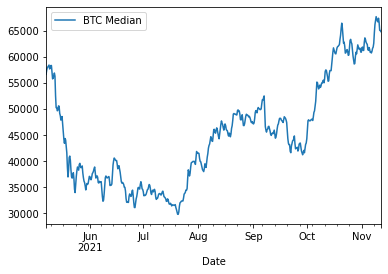

In [11]:
btc_plot.plot()

In [12]:
eth = requests.get('https://api.kucoin.com/api/v1/market/candles?type=8hour&symbol=ETH-USDT&startAt=1620360000&endAt=0')
eth_j = eth.json()
eth_df = pd.DataFrame(eth_j['data'])
eth_df.rename(columns={0:'Date',1:'Open',2:'Close'}, inplace=True)
eth_df.drop(columns = [3,4,5,6], inplace=True)
eth_median = eth_df[['Open','Close']].astype(float)
eth_median['ETH Median'] = eth_median[['Open','Close']].mean(axis=1)
eth_median = eth_median['ETH Median']
eth_df_date = pd.to_datetime(eth_df['Date'], unit='s')
eth_date = [eth_df_date, eth_median]
eth_result = pd.concat(eth_date, axis=1, join = 'outer')
eth_result.set_index('Date', inplace=True)

In [20]:
bnb = requests.get('https://api.kucoin.com/api/v1/market/candles?type=8hour&symbol=BNB-USDT&startAt=1620360000&endAt=0')
bnb_j = bnb.json()
bnb_df = pd.DataFrame(bnb_j['data'])
bnb_df.rename(columns={0:'Date',1:'Open',2:'Close'}, inplace=True)
bnb_df.drop(columns = [3,4,5,6], inplace=True)
bnb_median = bnb_df[['Open','Close']].astype(float)
bnb_median['BNB Median'] = bnb_median[['Open','Close']].mean(axis=1)
bnb_median = bnb_median['BNB Median']
bnb_df_date = pd.to_datetime(bnb_df['Date'], unit='s')
bnb_date = [bnb_df_date, bnb_median]
bnb_result = pd.concat(bnb_date, axis=1, join = 'outer')
bnb_result.set_index('Date', inplace=True)

In [21]:
doge = requests.get('https://api.kucoin.com/api/v1/market/candles?type=8hour&symbol=DOGE-USDT&startAt=1620360000&endAt=0')
doge_j = doge.json()
doge_df = pd.DataFrame(doge_j['data'])
doge_df.rename(columns={0:'Date',1:'Open',2:'Close'}, inplace=True)
doge_df.drop(columns = [3,4,5,6], inplace=True)
doge_median = doge_df[['Open','Close']].astype(float)
doge_median['DOGE Median'] = doge_median[['Open','Close']].mean(axis=1)
doge_median = doge_median['DOGE Median']
doge_df_date = pd.to_datetime(doge_df['Date'], unit='s')
doge_date = [doge_df_date, doge_median]
doge_result = pd.concat(doge_date, axis=1, join = 'outer')
doge_result.set_index('Date', inplace=True)

In [22]:
ltc = requests.get('https://api.kucoin.com/api/v1/market/candles?type=8hour&symbol=LTC-USDT&startAt=1620360000&endAt=0')
ltc_j = ltc.json()
ltc_df = pd.DataFrame(ltc_j['data'])
ltc_df.rename(columns={0:'Date',1:'Open',2:'Close'}, inplace=True)
ltc_df.drop(columns = [3,4,5,6], inplace=True)
ltc_median = ltc_df[['Open','Close']].astype(float)
ltc_median['LTC Median'] = ltc_median[['Open','Close']].mean(axis=1)
ltc_median = ltc_median['LTC Median']
ltc_df_date = pd.to_datetime(ltc_df['Date'], unit='s')
ltc_date = [ltc_df_date, ltc_median]
ltc_result = pd.concat(ltc_date, axis=1, join = 'outer')
ltc_result.set_index('Date', inplace=True)

In [23]:
ada = requests.get('https://api.kucoin.com/api/v1/market/candles?type=8hour&symbol=ADA-USDT&startAt=1620360000&endAt=0')
ada_j = ada.json()
ada_df = pd.DataFrame(ada_j['data'])
ada_df.rename(columns={0:'Date',1:'Open',2:'Close'}, inplace=True)
ada_df.drop(columns = [3,4,5,6], inplace=True)
ada_median = ada_df[['Open','Close']].astype(float)
ada_median['ADA Median'] = ada_median[['Open','Close']].mean(axis=1)
ada_median = ada_median['ADA Median']
ada_df_date = pd.to_datetime(ada_df['Date'], unit='s')
ada_date = [ada_df_date, ada_median]
ada_result = pd.concat(ada_date, axis=1, join = 'outer')
ada_result.set_index('Date', inplace=True)

In [24]:
xrp = requests.get('https://api.kucoin.com/api/v1/market/candles?type=8hour&symbol=XRP-USDT&startAt=1620360000&endAt=0')
xrp_j = xrp.json()
xrp_df = pd.DataFrame(xrp_j['data'])
xrp_df.rename(columns={0:'Date',1:'Open',2:'Close'}, inplace=True)
xrp_df.drop(columns = [3,4,5,6], inplace=True)
xrp_median = xrp_df[['Open','Close']].astype(float)
xrp_median['XRP Median'] = xrp_median[['Open','Close']].mean(axis=1)
xrp_median = xrp_median['XRP Median']
xrp_df_date = pd.to_datetime(xrp_df['Date'], unit='s')
xrp_date = [xrp_df_date, xrp_median]
xrp_result = pd.concat(xrp_date, axis=1, join = 'outer')
xrp_result.set_index('Date', inplace=True)

In [25]:
usdt = requests.get('https://api.kucoin.com/api/v1/market/candles?type=8hour&symbol=USDT-USDC&startAt=1620360000&endAt=0')
usdt_j = usdt.json()
usdt_df = pd.DataFrame(usdt_j['data'])
usdt_df.rename(columns={0:'Date',1:'Open',2:'Close'}, inplace=True)
usdt_df.drop(columns = [3,4,5,6], inplace=True)
usdt_median = usdt_df[['Open','Close']].astype(float)
usdt_median['USDT Median'] = usdt_median[['Open','Close']].mean(axis=1)
usdt_median = usdt_median['USDT Median']
usdt_df_date = pd.to_datetime(usdt_df['Date'], unit='s')
usdt_date = [usdt_df_date, usdt_median]
usdt_result = pd.concat(usdt_date, axis=1, join = 'outer')
usdt_result.set_index('Date', inplace=True)

In [26]:
link = requests.get('https://api.kucoin.com/api/v1/market/candles?type=8hour&symbol=LINK-USDT&startAt=1620360000&endAt=0')
link_j = link.json()
link_df = pd.DataFrame(link_j['data'])
link_df.rename(columns={0:'Date',1:'Open',2:'Close'}, inplace=True)
link_df.drop(columns = [3,4,5,6], inplace=True)
link_median = link_df[['Open','Close']].astype(float)
link_median['LINK Median'] = link_median[['Open','Close']].mean(axis=1)
link_median = link_median['LINK Median']
link_df_date = pd.to_datetime(link_df['Date'], unit='s')
link_date = [link_df_date, link_median]
link_result = pd.concat(link_date, axis=1, join = 'outer')
link_result.set_index('Date', inplace=True)

In [27]:
uni = requests.get('https://api.kucoin.com/api/v1/market/candles?type=8hour&symbol=UNI-USDT&startAt=1620360000&endAt=0')
uni_j = uni.json()
uni_df = pd.DataFrame(uni_j['data'])
uni_df.rename(columns={0:'Date',1:'Open',2:'Close'}, inplace=True)
uni_df.drop(columns = [3,4,5,6], inplace=True)
uni_median = uni_df[['Open','Close']].astype(float)
uni_median['UNI Median'] = uni_median[['Open','Close']].mean(axis=1)
uni_median = uni_median['UNI Median']
uni_df_date = pd.to_datetime(uni_df['Date'], unit='s')
uni_date = [uni_df_date, uni_median]
uni_result = pd.concat(uni_date, axis=1, join = 'outer')
uni_result.set_index('Date', inplace=True)

In [28]:
index_tokens = pd.concat([btc_result, eth_result, ada_result, doge_result, ltc_result, bnb_result, xrp_result, uni_result, link_result, usdt_result, ada_result], axis=1, join='outer')
index_tokens

,BTC Median,ETH Median,ADA Median,DOGE Median,LTC Median,BNB Median,XRP Median,UNI Median,LINK Median,USDT Median,ADA Median
Date,,,,,,,,,,,
2021-11-11 16:00:00,64818.40,4721.300,2.079306,0.264835,264.9595,624.3240,1.212195,25.45410,35.51920,1.00030,2.079306
2021-11-11 08:00:00,65023.70,4705.560,2.109834,0.263585,265.0075,627.6265,1.228695,25.59940,35.84615,1.00035,2.109834
2021-11-11 00:00:00,65066.80,4661.345,2.120424,0.258475,262.8735,622.4050,1.217850,25.49950,35.22165,1.00065,2.120424
2021-11-10 16:00:00,66616.00,4739.455,2.175009,0.263620,273.7815,632.7695,1.256170,26.59735,36.17580,1.00040,2.175009
2021-11-10 08:00:00,67382.90,4781.610,2.238499,0.271960,278.0690,647.8305,1.279540,27.20790,36.28585,1.00015,2.238499
...,...,...,...,...,...,...,...,...,...,...,...
2021-05-08 16:00:00,58229.95,3770.255,1.594860,0.644480,341.1250,643.0210,1.554750,40.26905,47.78225,1.00160,1.594860
2021-05-08 08:00:00,58026.20,3579.080,1.603436,0.679830,340.6505,634.3460,1.573590,39.83970,47.80075,1.00140,1.603436
2021-05-08 00:00:00,57881.45,3503.850,1.646801,0.698930,345.5525,626.4420,1.589135,39.68295,48.89850,1.00120,1.646801


***_MEME TOKENS_***

In [ ]:
doge = requests.get('https://api.kucoin.com/api/v1/market/candles?type=8hour&symbol=DOGE-USDT&startAt=1620360000&endAt=0')
doge_j = doge.json()
doge_j

In [ ]:
elon = requests.get('https://api.kucoin.com/api/v1/market/candles?type=8hour&symbol=ELON-USDT&startAt=1620360000&endAt=0')
elon_j = elon.json()
elon_j

***_DEFI TOKENS_***

In [ ]:
uni = requests.get('https://api.kucoin.com/api/v1/market/candles?type=8hour&symbol=UNI-USDT&startAt=1620360000&endAt=0')
uni_j = uni.json()
uni_j

In [ ]:
luna = requests.get('https://api.kucoin.com/api/v1/market/candles?type=8hour&symbol=LUNA-USDT&startAt=1620360000&endAt=0')
luna_j = luna.json()
luna_j

In [ ]:
avax = requests.get('https://api.kucoin.com/api/v1/market/candles?type=8hour&symbol=AVAX-USDT&startAt=1620360000&endAt=0')
avax_j = avax.json()
avax_j

***_STORAGE TOKENS_***

In [ ]:
fil = requests.get('https://api.kucoin.com/api/v1/market/candles?type=8hour&symbol=FIL-USDT&startAt=1620360000')
fil_j = fil.json()
fil_j

In [ ]:
btt = requests.get('https://api.kucoin.com/api/v1/market/candles?type=8hour&symbol=BTT-USDT&startAt=1620360000')
btt_j = btt.json()
btt_j

In [ ]:
storj = requests.get('https://api.kucoin.com/api/v1/market/candles?type=8hour&symbol=STORJ-USDT&startAt=1620360000')
storj_j = storj.json()
storj_j